# **Decision Tree ML Model**


In [1]:
# using pandas to load the dataset
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('/Users/manavinair/Downloads/webmd.csv')


In [2]:
# load the first five rows
df.head()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1


In [3]:
# load the last five rows
df.tail()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
362801,55-64,Stop Smoking,11/14/2008,chantix,144470,5,5,I took the whole 12 weeks.I could have stopped...,5,Female,"Nausea , headache , vomiting , drowsiness, g...",2
362802,,Other,11/14/2008,chantix,144470,2,3,My dad strated taking Chantix about 1 month ag...,1,,"Nausea , headache , vomiting , drowsiness, g...",16
362803,25-34,Stop Smoking,11/13/2008,chantix,144470,2,4,"As long as I was on chantix, I didn't smoke. ...",2,Female,"Nausea , headache , vomiting , drowsiness, g...",3
362804,55-64,Stop Smoking,11/13/2008,chantix,144470,5,5,Started this medication Oct 5th 2008. Haven't ...,5,Male,"Nausea , headache , vomiting , drowsiness, g...",1
362805,45-54,Stop Smoking,11/12/2008,chantix,144470,4,5,"One year ago, I tried Chantix and had to stop ...",5,Female,"Nausea , headache , vomiting , drowsiness, g...",3


In [4]:
# check the number of rows and columns in the dataset
df.shape

(362806, 12)

In [5]:
# get the column names
df.columns

Index(['Age', 'Condition', 'Date', 'Drug', 'DrugId', 'EaseofUse',
       'Effectiveness', 'Reviews', 'Satisfaction', 'Sex', 'Sides',
       'UsefulCount'],
      dtype='object')

In [6]:
# check null values
df.isnull().sum()

Age               0
Condition         0
Date              0
Drug              0
DrugId            0
EaseofUse         0
Effectiveness     0
Reviews          37
Satisfaction      0
Sex               0
Sides             0
UsefulCount       0
dtype: int64

In [7]:
# concise summary of the dataframe 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362806 entries, 0 to 362805
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Age            362806 non-null  object
 1   Condition      362806 non-null  object
 2   Date           362806 non-null  object
 3   Drug           362806 non-null  object
 4   DrugId         362806 non-null  int64 
 5   EaseofUse      362806 non-null  int64 
 6   Effectiveness  362806 non-null  int64 
 7   Reviews        362769 non-null  object
 8   Satisfaction   362806 non-null  int64 
 9   Sex            362806 non-null  object
 10  Sides          362806 non-null  object
 11  UsefulCount    362806 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 33.2+ MB


In [8]:
# description of the data in the DataFrame
df.describe()

,DrugId,EaseofUse,Effectiveness,Satisfaction,UsefulCount
count,362806.000000,362806.000000,362806.000000,362806.000000,362806.000000
mean,36879.370774,4.019829,3.532061,3.135408,6.744916
std,52624.412971,1.317711,1.455961,1.611106,9.324240
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,4896.000000,3.000000,3.000000,1.000000,1.000000
50%,9548.000000,5.000000,4.000000,3.000000,4.000000
75%,63522.000000,5.000000,5.000000,5.000000,9.000000
max,178546.000000,10.000000,10.000000,10.000000,255.000000


In [9]:
# number of unique values for each column
df.nunique()

Age                  12
Condition          1806
Date               4524
Drug               7093
DrugId             6572
EaseofUse             7
Effectiveness         7
Reviews          250167
Satisfaction          7
Sex                   3
Sides              1651
UsefulCount         148
dtype: int64

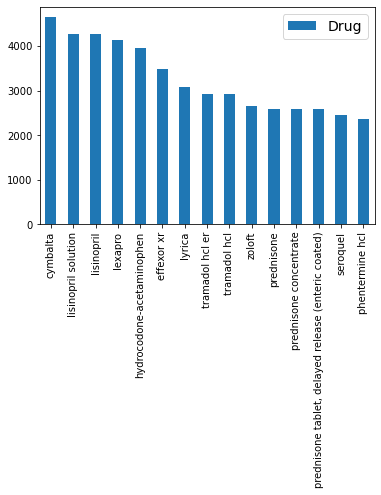

In [10]:
# check common drug names present in the dataset
df['Drug'].value_counts().head(15).plot(kind='bar')
plt.legend(fontsize= 14)
plt.rcParams['figure.figsize'] = (10,7)
plt.show()

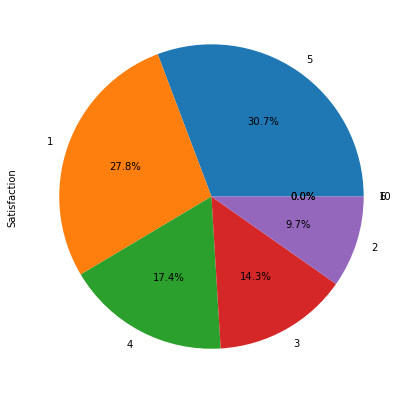

In [11]:
# check satisfaction level of the people
df['Satisfaction'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.show()

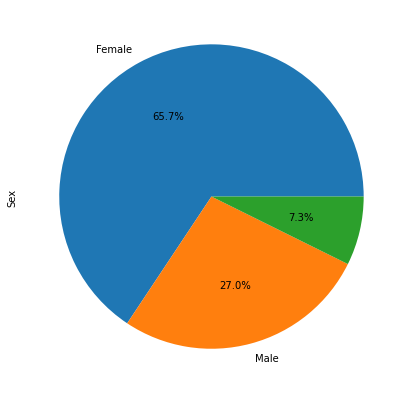

In [12]:
# check percentage of male and female in the dataset
df['Sex'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.show()

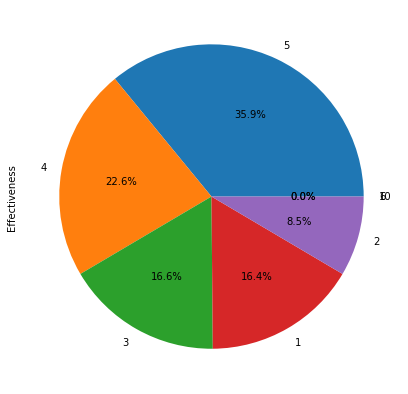

In [13]:
# check effectiveness of the drugs
df['Effectiveness'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.show()

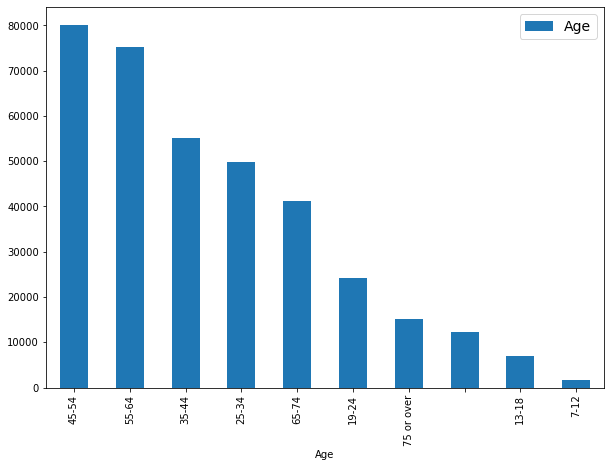

In [14]:
# check common age groups present in the dataset
df['Age'].value_counts().head(10).plot(kind='bar')
plt.legend(fontsize= 14)
plt.xlabel('Age')
plt.show()

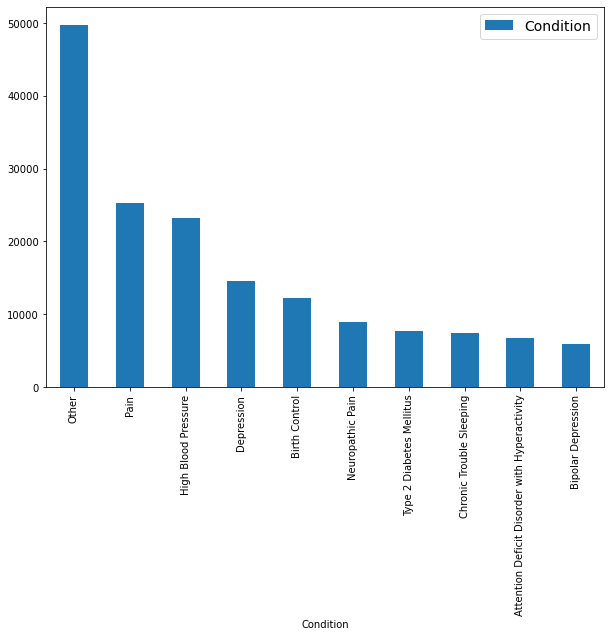

In [15]:
# check common conditions of the patients 
df['Condition'].value_counts().head(10).plot(kind='bar')
plt.legend(fontsize= 14)
plt.xlabel('Condition')
plt.show()

In [16]:
# remove unwanted columns 
df.drop('Reviews',axis=1,inplace=True)
df.drop('DrugId',axis=1,inplace=True)
df.drop('EaseofUse',axis=1,inplace=True)
df.drop('UsefulCount',axis=1,inplace=True)
df.drop('Date',axis=1,inplace=True)
df.drop('Satisfaction',axis=1,inplace=True)

In [17]:
#define target variable
target = df.pop('Sides')
df.head()

,Age,Condition,Drug,Effectiveness,Sex
0,75 or over,Stuffy Nose,25dph-7.5peh,5,Male
1,25-34,Cold Symptoms,25dph-7.5peh,5,Female
2,65-74,Other,warfarin (bulk) 100 % powder,3,Female
3,75 or over,Other,warfarin (bulk) 100 % powder,2,Female
4,35-44,Other,warfarin (bulk) 100 % powder,1,Male


In [18]:
#convert the categorical values into numerical values
cols = ['Age','Condition','Drug', 'Effectiveness', 'Sex']

for x in cols:
  df[x] = pd.factorize(df[x])[0]

target = pd.factorize(target)[0]
df.head()

,Age,Condition,Drug,Effectiveness,Sex
0,0,0,0,0,0
1,1,1,0,0,1
2,2,2,1,1,1
3,0,2,1,2,1
4,3,2,1,3,0


In [19]:
# import StandardScaler to remove the mean and scales each feature/variable to unit variance
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df = scaler.fit_transform(df)
df

array([[-1.87166523, -0.79553347, -1.47110698, -1.07325584, -1.45495015],
       [-1.35491482, -0.79224183, -1.47110698, -1.07325584,  0.35714956],
       [-0.83816441, -0.78895019, -1.4706326 , -0.45269346,  0.35714956],
       ...,
       [-1.35491482,  0.69557885,  1.89273703,  1.40899369,  0.35714956],
       [ 0.1953364 ,  0.69557885,  1.89273703, -1.07325584, -1.45495015],
       [ 0.71208681,  0.69557885,  1.89273703, -1.07325584,  0.35714956]])

In [20]:
# import train_test_split and Decision tree classifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

x_train, x_test, y_train, y_test = train_test_split(df, target, test_size=.30,random_state=100)

model=DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred= model.predict(x_test)

In [21]:
# print training and testing accuracy
print('Training Accuracy: ',model.score(x_train, y_train)*100)
print('Testing Accuracy: ', model.score(x_test, y_test)*100)

Training Accuracy:  99.99803121702288
Testing Accuracy:  98.04762867275501


In [22]:
# measure the quality of predictions 
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.73      0.80        48
           1       0.94      0.93      0.94      5244
           2       0.99      0.99      0.99      3624
           3       0.92      0.92      0.92        36
           4       0.98      0.97      0.98       258
           5       0.83      0.85      0.84       202
           6       1.00      1.00      1.00        48
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00       962
          10       0.67      0.67      0.67         3
          11       0.84      1.00      0.91        21
          13       0.95      1.00      0.97        36
          14       0.50      0.50      0.50         4
          15       0.93      0.74      0.82        19
          17       0.98      0.95      0.96        86
          18       1.00      1.00      1.00        32
          19       0.89    

/Users/manavinair/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/manavinair/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/manavinair/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/manav

In [23]:
# evaluate the performance of the classification model
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[  35    3    0 ...    0    0    0]
 [   2 4882    8 ...    1    1    0]
 [   0    7 3588 ...    0    0    0]
 ...
 [   0    0    0 ...    2    0    0]
 [   0    1    0 ...    0    4    0]
 [   0    0    0 ...    0    0    5]]


In [24]:
# check real values with predicted values
data = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
data

,Real Values,Predicted Values
0,605,605
1,84,84
2,1194,1194
3,1214,1214
4,1159,1159
...,...,...
108837,647,647
108838,1046,1046
108839,547,547
108840,1030,1030


In [25]:
# print accuracy,recall,precision and f1 score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

print('Accuracy score: ',accuracy_score(y_test,y_pred)*100)
print('Recall score: ',recall_score(y_test,y_pred,average='weighted',zero_division=0)*100)
print('Precision score: ',precision_score(y_test,y_pred,average='weighted',zero_division=0)*100)
print('F1 score: ',f1_score(y_test,y_pred,average='weighted',zero_division=0)*100)

Accuracy score:  98.04762867275501
Recall score:  98.04762867275501
Precision score:  98.06165558351708
F1 score:  97.99936632384048
